In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.info()
data.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [2]:
# Kolumny i unikalne wartości
data["gender"].unique()
for i in data.columns:
    print(i)
    print(data[i].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [3]:
# konwersja typu kolumny Total Charges z string na float i uzupełnienie nanów zerami.
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"], errors='coerce')
data["TotalCharges"] = data["TotalCharges"].replace(np.nan, 0, regex=True)

In [4]:
# podział na data i target
X = data.drop(columns="Churn")
y = data["Churn"]

In [5]:
# podział na czesc testową
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

In [6]:
# One Hot Encoding na zbiorze treningowym 
encoder = OneHotEncoder(sparse=False)
transformed = encoder.fit_transform(X_train[["gender","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]])
features = []
for i in encoder.categories_:
    for cat in i:
        features.append(cat)
transformed

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [7]:
# połączenie encodowanych kolumn z pozostałymi ze zbioru treningowego
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_train_transf = pd.DataFrame(transformed, columns=features)
X_train_transf["tenure"] = X_train["tenure"]
X_train_transf["MonthlyCharges"] = X_train["MonthlyCharges"]
X_train_transf["TotalCharges"] = X_train["TotalCharges"]
X_train_transf.head()

,Female,Male,No,Yes,No,Yes,No,Yes,No,No phone service,...,Two year,No,Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,44,54.30,2390.45
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,27,95.60,2595.25
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,68.95,119.75
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,20.35,41.85
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12,83.80,1029.75


In [8]:
# One Hot encoding dla kolumn ze zbioru testowego oraz połączenie z pozostałymi kolumnami

test_transformed = encoder.fit_transform(X_test[["gender","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]])
X_test_transf = pd.DataFrame(test_transformed, columns=features)
X_test_transf["tenure"] = X_test["tenure"]
X_test_transf["MonthlyCharges"] = X_test["MonthlyCharges"]
X_test_transf["TotalCharges"] = X_test["TotalCharges"]
X_test_transf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Female                     1409 non-null   float64
 1   Male                       1409 non-null   float64
 2   No                         1409 non-null   float64
 3   Yes                        1409 non-null   float64
 4   No                         1409 non-null   float64
 5   Yes                        1409 non-null   float64
 6   No                         1409 non-null   float64
 7   Yes                        1409 non-null   float64
 8   No                         1409 non-null   float64
 9   No phone service           1409 non-null   float64
 10  Yes                        1409 non-null   float64
 11  No                         1409 non-null   float64
 12  No internet service        1409 non-null   float64
 13  Yes                        1409 non-null   float

In [9]:
# konwersja wartości z kolumny churn z yes/no do wartości 1/0
lb = LabelBinarizer()
transformedYtrain = lb.fit_transform(y_train)
transformedYtest = lb.fit_transform(y_test)



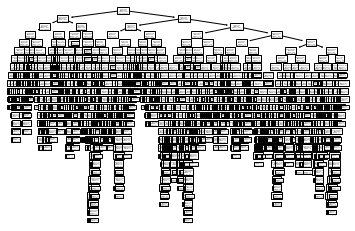

In [10]:
drzewo = DecisionTreeClassifier()
drzewo.fit(X_train_transf, transformedYtrain)
plot_tree(drzewo)
plt.show()

In [11]:
pred = drzewo.predict(X_test_transf)
np.mean(transformedYtest == pred)

0.6057419579394554

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(transformedYtest, pred)

0.7267565649396736

In [13]:
# Optymalizacja hiperparametrów
params={'criterion':['gini', 'entropy'],
       'max_depth':[1, 2, 3, 4, 5, 6]}
grid = GridSearchCV(estimator=drzewo, 
                    param_grid=params, 
                    verbose=10, 
                    scoring='accuracy',
                   cv=10)
grid.fit(X_train_transf, transformedYtrain)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.736, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.737, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] ......... criterion=gini, max_depth=1, score=0.737, total=   0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=2, score=0.730, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.730, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.726, total=   0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV] ......... criterion=gini, max_depth=2, score=0.767, total=   0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ......... criterion=gini, max_depth=3, score=0.752, total=   0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ......... criterion=gini, max_depth=3, score=0.773, total=   0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] .

[CV] ...... criterion=entropy, max_depth=3, score=0.805, total=   0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.783, total=   0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.778, total=   0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ...... criterion=entropy, max_depth=3, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.1s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [14]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [15]:
grid.best_score_

0.7937537004144464

In [16]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(166.70250000000001, 199.32, 'X[29] <= 0.5\nentropy = 0.832\nsamples = 5634\nvalue = [4149, 1485]'),
 Text(87.885, 163.07999999999998, 'X[31] <= 0.5\nentropy = 0.349\nsamples = 2561\nvalue = [2393, 168]'),
 Text(44.64, 126.83999999999999, 'X[28] <= 0.5\nentropy = 0.496\nsamples = 1186\nvalue = [1057, 129]'),
 Text(22.32, 90.6, 'X[36] <= 0.5\nentropy = 0.282\nsamples = 655\nvalue = [623, 32]'),
 Text(11.16, 54.359999999999985, 'X[38] <= 25.5\nentropy = 0.217\nsamples = 549\nvalue = [530, 19]'),
 Text(5.58, 18.119999999999976, 'entropy = 0.351\nsamples = 197\nvalue = [184, 13]'),
 Text(16.740000000000002, 18.119999999999976, 'entropy = 0.125\nsamples = 352\nvalue = [346, 6]'),
 Text(33.480000000000004, 54.359999999999985, 'X[39] <= 82.45\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(27.9, 18.119999999999976, 'entropy = 0.35\nsamples = 76\nvalue = [71, 5]'),
 Text(39.06, 18.119999999999976, 'entropy = 0.837\nsamples = 30\nvalue = [22, 8]'),
 Text(66.96000000000001, 90.6,

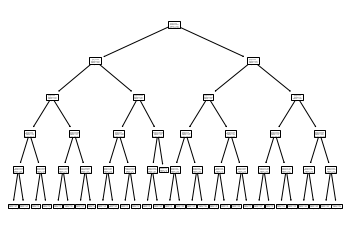

In [17]:
plot_tree(grid.best_estimator_)